In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from scipy.stats import randint
import statsmodels.api as sm

In [2]:
def DealMissingData(X, dfX):
    ''' deal with missing data
        X: data, type(numpy array)
        dfX: same as X data, type(pandas array) '''
    
    print("----------- Start deal missing data -----------")
    TFarr = np.array(dfX.isna().any())
    for index, ele in enumerate(TFarr):
        if ele:
            if isinstance(X[0][index], str):
                # deal with string data
                imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
                imputer.fit(X[:, [index]])
                X[:, [index]] = imputer.transform(X[:, [index]])
            else:
                # deal with digital data
                imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
                imputer.fit(X[:, [index]])
                X[:, [index]] = imputer.transform(X[:, [index]])
            print(f"{index} column have missing data, fixed!")
        else:
            print(f"{index} column not have missing data")
            
    print("----------- End deal missing data! -----------")
    return X

In [3]:
def MakeOneHot(X, column_name, pos={}):
    ''' make one-hot  
        X: data, type(numpy array)
        pos: where need to onehot, type(dictionary) '''
    
    print("----------- Start onehot -----------")
    FeaturesNum = len(X[0])    # init
    if bool(pos):
        # custom onehot (onehot pos that u want to)
        for key in pos:
            print(f"{FeaturesNum-pos[key]} column need to one-hot, fixed!")
            ct = ColumnTransformer([(key, OneHotEncoder(), [FeaturesNum-pos[key]])], remainder='passthrough')
            NewX = ct.fit_transform(X)
            X = NewX[:, 1:]
            FeaturesNum = len(X[0])
    else:
        # auto onehot (only onehot string cols)
        i = 0
        cn = list(column_name)
        while i < FeaturesNum:
            if isinstance(X[0][i], str):
                print(f"{i} column need to one-hot, fixed!")
                label = cn.pop(i)
                print(label)
                ct = ColumnTransformer([(str(i), OneHotEncoder(), [i])], remainder='passthrough')
                ct_X = ct.fit_transform(X)
                NewX = ct_X[:, 1:]
                OneHotLabel = ct.named_transformers_[str(i)]
                for num in range(len(OneHotLabel.categories_[0])-1):
                    cn.insert(num,label+str(num+1))
                i += len(NewX[0]) - len(X[0])
                X = NewX
                FeaturesNum = len(X[0])
            i += 1
    print("----------- End onehot -----------")
    
    return X,cn


In [4]:
def NormalizeData(data_train, data_test):
    ''' normalize data
        data_train: training data, type(numpy array)
        data_test: testing data, type(numpy array) '''
    
    print("----------- Start normalize -----------")
    sc = StandardScaler()
    data_train = sc.fit_transform(data_train)
    data_test = sc.transform(data_test)
    
    print("----------- End normalize -----------")
    return data_train, data_test

In [5]:
def DrawRelationship(X, y, label_x, label_y):
    for key in label_x:
        allarr = []
        for i in range(len(X)):
            allarr.append(X[i][label_x[key]])
        
        if ispred:
            plt.scatter(allarr, pred, c="blue")
        plt.scatter(allarr, y, c="red")
        plt.xlabel(key)
        plt.ylabel(label_y)
        plt.show() 

In [6]:
def DrawPredict(gt, pred, title):
    ''' data [[groundTruth, predict], [], ....]'''
    
    data = []
    for i in range(len(gt)):
        data.append([gt[i], pred[i]])
        
    data.sort(key=lambda x:x[0])
    for index, ele in enumerate(data):
        plt.scatter(index, data[index][1], c="blue", s=0.7)
        plt.scatter(index, data[index][0], c="red", s=0.7)
    plt.xlabel("data sort by charges")
    plt.ylabel("charges")
    plt.title(title)
    plt.show() 

In [7]:
def TrainAndTestModel(model, X_train, y_train, X_test, y_test, title):
    model.fit(X_train, y_train)
    
    train_pred = model.predict(X_train)
    train_acc = model.score(X_train, y_train)
    train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
    train_mae =  mean_absolute_error(y_train, train_pred)
    DrawPredict(y_train, train_pred, title+"_Train" + "\n" + f"RMSE: {train_rmse}, MAE: {train_mae}\nACC: {train_acc}")
    
    test_pred = model.predict(X_test)
    test_acc = model.score(X_test, y_test)
    test_rmse = np.sqrt(mean_squared_error(y_test, test_pred))
    test_mae =  mean_absolute_error(y_test, test_pred)
    DrawPredict(y_test, test_pred, title+"_Test" + "\n" + f"RMSE: {test_rmse}, MAE: {test_mae}\nACC: {test_acc}")
    return model

<h1>Data preprocessing</h1>

In [8]:
df = pd.read_csv("./DATA/final_project_dataset_1.csv")

dfX = df.iloc[:, :-1]
X = dfX.values
y = df.iloc[:, -1].values
column_name = np.array(dfX.columns.values)

#DrawRelationship(X, y, label_x={'age': 0, 'sex': 1, 'bmi': 2, 'children': 3, 'smoker': 4, 'region': 5}, label_y='charges')

X = DealMissingData(X, dfX)

#pos2onehot = {'Sex': 5, 'children': 3, 'Smoker': 2, 'Region': 1}
X,column_name = MakeOneHot(X,column_name)

# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# X_train, X_test = NormalizeData(X_train, X_test)
print(X[0])
for ele in zip(X[0], column_name):
    print(f"{ele[1]} : {ele[0]}")
print("Preprocessing data done!")

----------- Start deal missing data -----------
0 column not have missing data
1 column not have missing data
2 column not have missing data
3 column not have missing data
4 column not have missing data
5 column not have missing data
----------- End deal missing data! -----------
----------- Start onehot -----------
1 column need to one-hot, fixed!
sex
4 column need to one-hot, fixed!
smoker
5 column need to one-hot, fixed!
region
----------- End onehot -----------
[0.0 0.0 1.0 1.0 0.0 19 27.9 0]
region1 : 0.0
region2 : 0.0
region3 : 1.0
smoker1 : 1.0
sex1 : 0.0
age : 19
bmi : 27.9
children : 0
Preprocessing data done!


<h1>LinearRegressor</h1>

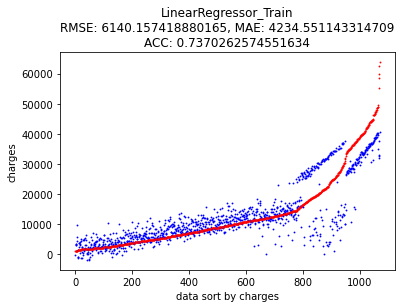

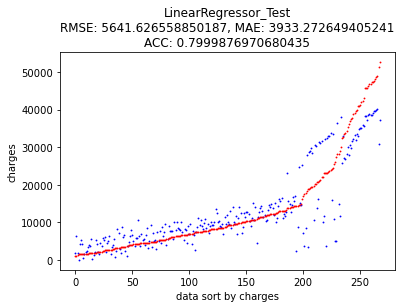

LinearRegression()

In [9]:
TrainAndTestModel(LinearRegression(), X_train, y_train, X_test, y_test, "LinearRegressor")

<h1>OLS</h1>

In [10]:
X_train_std = np.append(arr=np.ones((len(X_train), 1)).astype(int), values=X_train, axis=1)
print(X_train_std[:5])

[[1 0.0 0.0 1.0 1.0 1.0 37 34.1 4]
 [1 0.0 1.0 0.0 0.0 1.0 18 34.43 0]
 [1 0.0 0.0 0.0 1.0 0.0 23 36.67 2]
 [1 0.0 0.0 1.0 0.0 1.0 32 35.2 2]
 [1 0.0 0.0 0.0 0.0 0.0 58 32.395 1]]


In [11]:
X_opt = X_train_std[:, [0,1,2,3,4,5,6,7,8]]
X_opt = np.array(X_opt, dtype=float)

regressor_OLS = sm.OLS(endog=y_train, exog=X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     371.7
Date:                Tue, 05 Jan 2021   Prob (F-statistic):          1.85e-301
Time:                        21:02:42   Log-Likelihood:                -10851.
No. Observations:                1070   AIC:                         2.172e+04
Df Residuals:                    1061   BIC:                         2.177e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.183e+04   1127.759    -10.488      0.000    -1.4e+04   -9615.183
x1          -260.1327    550.305     -0.473      0.637   -1339.943     819.678
x2          -913.2788    549.905     -1.661      0.097   -1992.304     165.747
x3          -761.9487    543.309     -1.402      0.161   -1828.031     304.134
x4          2.361e+04    470.606     50.159      0.000    2.27e+04    2.45e+04
x5           -15.4637    378.193     -0.041      0.967    -757.555     726.627
x6           253.7005     13.530     18.751      0.000     227.152     280.249
x7           335.9628     32.228     10.424      0.000     272.724     399.201
x8           436.9101    156.584      2.790      0.005     129.661     744.159
==============================================================================
Omnibus:                      256.825   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              620.044
Skew:                           1.279   Prob(JB):                    2.29e-135
Kurtosis:                       5.715   Cond. No.                         314.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
X_opt = X_train_std[:, [0,1,2,3,4,6,7,8]]
X_opt = np.array(X_opt, dtype=float)

regressor_OLS = sm.OLS(endog=y_train, exog=X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     425.2
Date:                Tue, 05 Jan 2021   Prob (F-statistic):          8.67e-303
Time:                        21:02:42   Log-Likelihood:                -10851.
No. Observations:                1070   AIC:                         2.172e+04
Df Residuals:                    1062   BIC:                         2.176e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.183e+04   1115.866    -10.606      0.000    -1.4e+04   -9645.051
x1          -259.8780    550.011     -0.472      0.637   -1339.110     819.354
x2          -913.5870    549.595     -1.662      0.097   -1992.003     164.829
x3          -761.7475    543.031     -1.403      0.161   -1827.284     303.789
x4           2.36e+04    469.846     50.238      0.000    2.27e+04    2.45e+04
x5           253.7129     13.520     18.765      0.000     227.183     280.242
x6           335.9233     32.199     10.433      0.000     272.743     399.104
x7           436.7285    156.447      2.792      0.005     129.748     743.710
==============================================================================
Omnibus:                      256.860   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              620.253
Skew:                           1.279   Prob(JB):                    2.06e-135
Kurtosis:                       5.715   Cond. No.                         311.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
X_opt = X_train_std[:, [0,2,3,4,6,7,8]]
X_opt = np.array(X_opt, dtype=float)

regressor_OLS = sm.OLS(endog=y_train, exog=X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     496.4
Date:                Tue, 05 Jan 2021   Prob (F-statistic):          4.17e-304
Time:                        21:02:43   Log-Likelihood:                -10852.
No. Observations:                1070   AIC:                         2.172e+04
Df Residuals:                    1063   BIC:                         2.175e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.198e+04   1073.174    -11.162      0.000   -1.41e+04   -9872.616
x1          -783.3806    475.342     -1.648      0.100   -1716.096     149.334
x2          -630.4111    466.327     -1.352      0.177   -1545.437     284.614
x3          2.361e+04    469.557     50.279      0.000    2.27e+04    2.45e+04
x4           253.8810     13.511     18.791      0.000     227.370     280.392
x5           336.1082     32.185     10.443      0.000     272.956     399.261
x6           436.3103    156.388      2.790      0.005     129.447     743.174
==============================================================================
Omnibus:                      256.390   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              617.444
Skew:                           1.278   Prob(JB):                    8.39e-135
Kurtosis:                       5.706   Cond. No.                         293.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
X_opt = X_train_std[:, [0,2,4,6,7,8]]
X_opt = np.array(X_opt, dtype=float)

regressor_OLS = sm.OLS(endog=y_train, exog=X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     594.8
Date:                Tue, 05 Jan 2021   Prob (F-statistic):          4.05e-305
Time:                        21:02:43   Log-Likelihood:                -10852.
No. Observations:                1070   AIC:                         2.172e+04
Df Residuals:                    1064   BIC:                         2.175e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -1.21e+04   1070.024    -11.305      0.000   -1.42e+04   -9996.974
x1          -548.6738    442.673     -1.239      0.215   -1417.285     319.937
x2          2.363e+04    469.372     50.353      0.000    2.27e+04    2.46e+04
x3           254.4110     13.510     18.831      0.000     227.901     280.921
x4           332.2267     32.069     10.360      0.000     269.301     395.152
x5           423.5793    156.165      2.712      0.007     117.154     730.005
==============================================================================
Omnibus:                      258.860   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              626.995
Skew:                           1.287   Prob(JB):                    7.07e-137
Kurtosis:                       5.727   Cond. No.                         292.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
X_opt = X_train_std[:, [0,4,6,7,8]]
X_opt = np.array(X_opt, dtype=float)

regressor_OLS = sm.OLS(endog=y_train, exog=X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     742.8
Date:                Tue, 05 Jan 2021   Prob (F-statistic):          3.00e-306
Time:                        21:02:43   Log-Likelihood:                -10853.
No. Observations:                1070   AIC:                         2.172e+04
Df Residuals:                    1065   BIC:                         2.174e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.191e+04   1059.711    -11.239      0.000    -1.4e+04   -9831.179
x1          2.359e+04    467.981     50.403      0.000    2.27e+04    2.45e+04
x2           254.9715     13.506     18.878      0.000     228.470     281.473
x3           320.6190     30.679     10.451      0.000     260.422     380.816
x4           430.5457    156.103      2.758      0.006     124.242     736.849
==============================================================================
Omnibus:                      257.442   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              620.986
Skew:                           1.282   Prob(JB):                    1.43e-135
Kurtosis:                       5.712   Cond. No.                         289.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
X_train_opt = X_train[:, [3, 5, 6, 7]]    # select opt's columns
X_test_opt = X_test[:, [3, 5, 6, 7]]   # select opt's columns correspond train

<h1>Linear opt</h1>

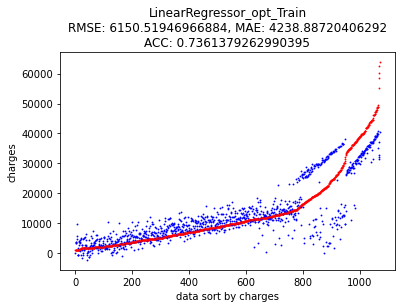

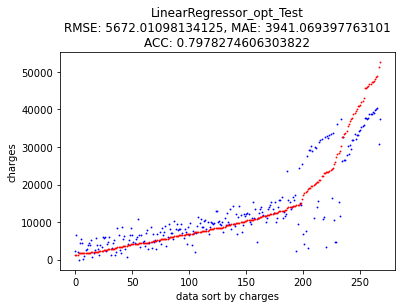

LinearRegression()

In [17]:
TrainAndTestModel(LinearRegression(), X_train_opt, y_train, X_test_opt, y_test, "LinearRegressor_opt")

<h1>SVR</h1>

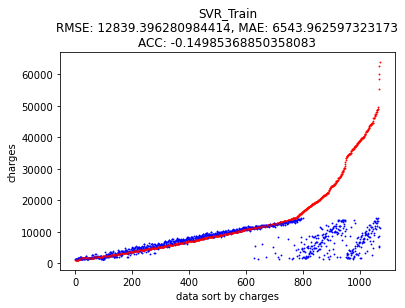

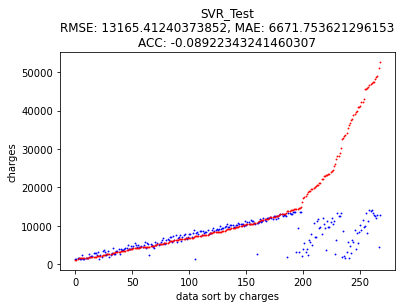

SVR(kernel='linear')

In [18]:
TrainAndTestModel(SVR(kernel="linear"), X_train, y_train, X_test, y_test, "SVR")

<h1>DecisionTreeRegressor</h1>

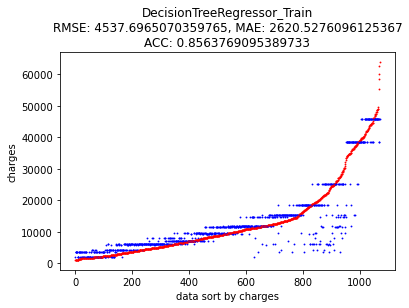

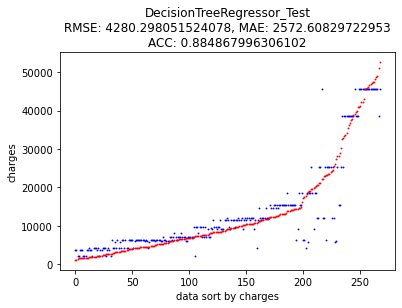

DecisionTreeRegressor(min_samples_split=100)

In [19]:
TrainAndTestModel(DecisionTreeRegressor(min_samples_split=100), X_train, y_train, X_test, y_test, "DecisionTreeRegressor")

<h1>RandomForestRegressor</h1>

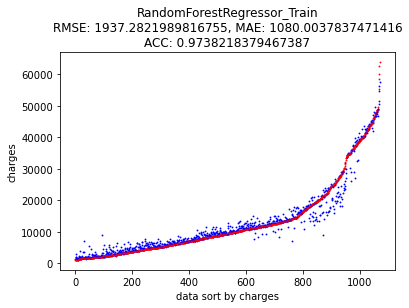

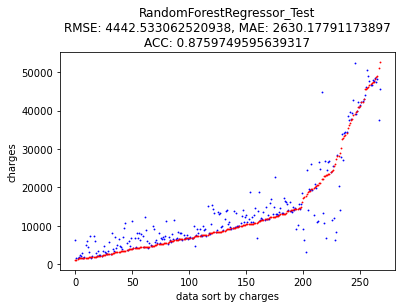

RandomForestRegressor()

In [20]:
TrainAndTestModel(RandomForestRegressor(), X_train, y_train, X_test, y_test, "RandomForestRegressor")

<h1>RandomForestRegressor OPT</h1>

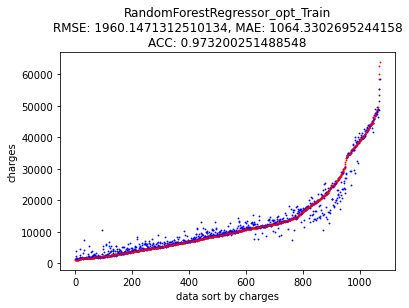

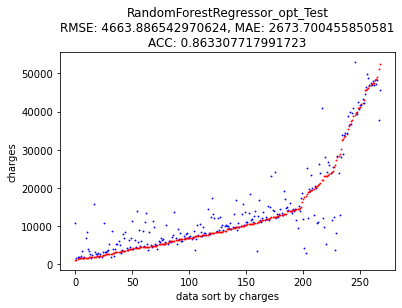

RandomForestRegressor()

In [21]:
TrainAndTestModel(RandomForestRegressor(), X_train_opt, y_train, X_test_opt, y_test, "RandomForestRegressor_opt")

<h1>Grid Search</h1>

In [22]:
param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30, 40],'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10, 30], 'max_features': [2, 3, 4, 5, 6]},
]
print(type(param_grid))

<class 'list'>


In [23]:
forest_reg = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30, 40]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4, 5, 6],
                          'n_estimators': [3, 10, 30]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [24]:
grid_search.best_params_

{'max_features': 4, 'n_estimators': 40}

In [25]:
grid_search.get_params()

{'cv': 5,
 'error_score': nan,
 'estimator__bootstrap': True,
 'estimator__ccp_alpha': 0.0,
 'estimator__criterion': 'mse',
 'estimator__max_depth': None,
 'estimator__max_features': 'auto',
 'estimator__max_leaf_nodes': None,
 'estimator__max_samples': None,
 'estimator__min_impurity_decrease': 0.0,
 'estimator__min_impurity_split': None,
 'estimator__min_samples_leaf': 1,
 'estimator__min_samples_split': 2,
 'estimator__min_weight_fraction_leaf': 0.0,
 'estimator__n_estimators': 100,
 'estimator__n_jobs': None,
 'estimator__oob_score': False,
 'estimator__random_state': 42,
 'estimator__verbose': 0,
 'estimator__warm_start': False,
 'estimator': RandomForestRegressor(random_state=42),
 'iid': 'deprecated',
 'n_jobs': None,
 'param_grid': [{'n_estimators': [3, 10, 30, 40],
   'max_features': [2, 4, 6, 8]},
  {'bootstrap': [False],
   'n_estimators': [3, 10, 30],
   'max_features': [2, 3, 4, 5, 6]}],
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'return_train_score': True,
 'scoring': 

In [26]:
feature_importances = grid_search.best_estimator_.feature_importances_
sorted(zip(feature_importances, column_name), reverse=True)

[(0.6132480650978589, 'smoker1'),
 (0.1869544655439306, 'bmi'),
 (0.14499267990482098, 'age'),
 (0.024807084912781063, 'children'),
 (0.009230363304634039, 'sex1'),
 (0.007158791726933465, 'region2'),
 (0.007004594605592865, 'region3'),
 (0.006603954903448096, 'region1')]

In [27]:
final_model = grid_search.best_estimator_
final_predictions = final_model.predict(X_test)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

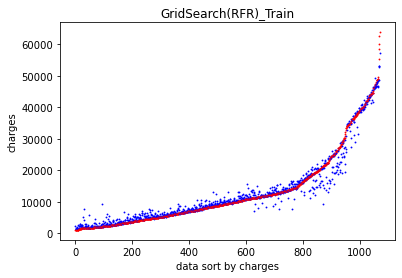

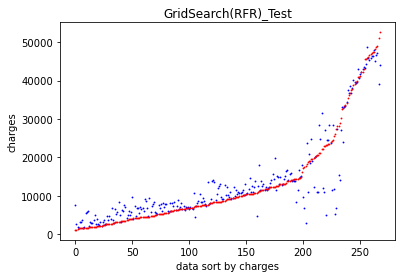

In [28]:
DrawPredict(y_train, final_model.predict(X_train), "GridSearch(RFR)_Train")
DrawPredict(y_test, final_predictions, "GridSearch(RFR)_Test")

In [29]:
final_rmse

4142.539079488178

In [30]:
final_model.score(X_test, y_test)

0.892159655072697

<h1>Random search<\h1>

In [31]:
param_distribs = {
    'n_estimators': randint(low=1, high=300),
    'max_features': randint(low=1, high=9),
}

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=40, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_iter=40,
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000290A582A490>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000290A58213D0>},
                   random_state=42, scoring='neg_mean_squared_error')

In [32]:
rnd_search.best_params_

{'max_features': 4, 'n_estimators': 277}

In [33]:
feature_importances = rnd_search.best_estimator_.feature_importances_
sorted(zip(feature_importances, column_name), reverse=True)

[(0.6136707158710911, 'smoker1'),
 (0.18273338695091892, 'bmi'),
 (0.14732309746646335, 'age'),
 (0.02524062075165442, 'children'),
 (0.008698323933518996, 'sex1'),
 (0.008510634032072011, 'region2'),
 (0.007153498469560634, 'region1'),
 (0.00666972252472053, 'region3')]

In [40]:
# test rmse, mae, acc
rnd_search_model = rnd_search.best_estimator_
rnd_search_predictions = rnd_search_model.predict(X_test)

rnd_search_mse = mean_squared_error(y_test, rnd_search_predictions)
rnd_search_rmse = np.sqrt(rnd_search_mse)
rnd_search_mae = mean_absolute_error(y_test, rnd_search_predictions)
rnd_search_acc = rnd_search_model.score(X_test, y_test)
print(rnd_search_rmse, rnd_search_mae, rnd_search_acc)

In [44]:
# train rmse, mae
rnd_search_predictions_t = rnd_search_model.predict(X_train)
rnd_search_mse_t = mean_squared_error(y_train, rnd_search_predictions_t)
rnd_search_rmse_t = np.sqrt(rnd_search_mse_t)
rnd_search_mae_t = mean_absolute_error(y_train, rnd_search_predictions_t)
rnd_search_acc_t = rnd_search_model.score(X_train, y_train)

print(rnd_search_rmse_t, rnd_search_mae_t, rnd_search_acc_t)

1842.644002123298 1030.8256864639043


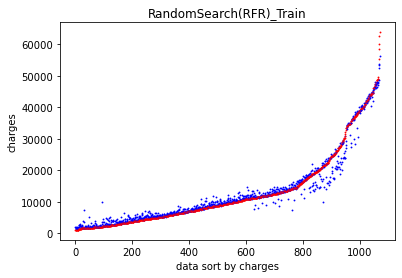

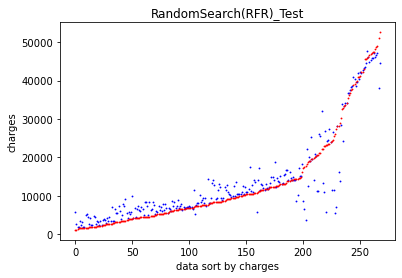

In [37]:
DrawPredict(y_train, rnd_search_model.predict(X_train), "RandomSearch(RFR)_Train")
DrawPredict(y_test, rnd_search_predictions, "RandomSearch(RFR)_Test")

In [38]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 5)
x_poly = poly_reg.fit_transform(X)
regressor_PR = LinearRegression()
regressor_PR.fit(x_poly,y)
acc_PR = regressor_PR.score(x_poly,y)
acc_PR

0.8854989858791109

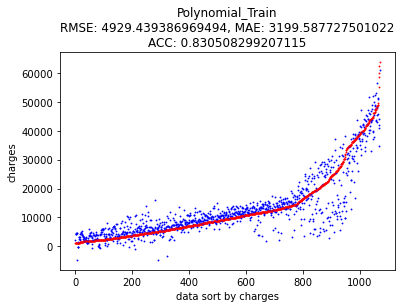

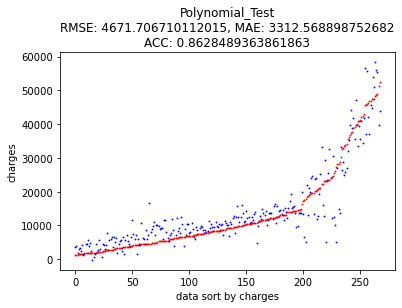

LinearRegression()

In [39]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 3)
TrainAndTestModel(LinearRegression(), poly_reg.fit_transform(X_train), y_train, poly_reg.fit_transform(X_test), y_test, "Polynomial")